## Import Libraries Packages, Downloads

In [125]:
import numpy as np
import pandas as pd
import warnings

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import math as mt

from sklearn.model_selection import train_test_split

## Loading and Processing Data
`Note: (Because none of the processing we are doing involves imputation or such, we are doing the processing before the split)`

In [126]:
warnings.filterwarnings('ignore')


Data = pd.read_csv('formatted_data.csv')

## Plotting

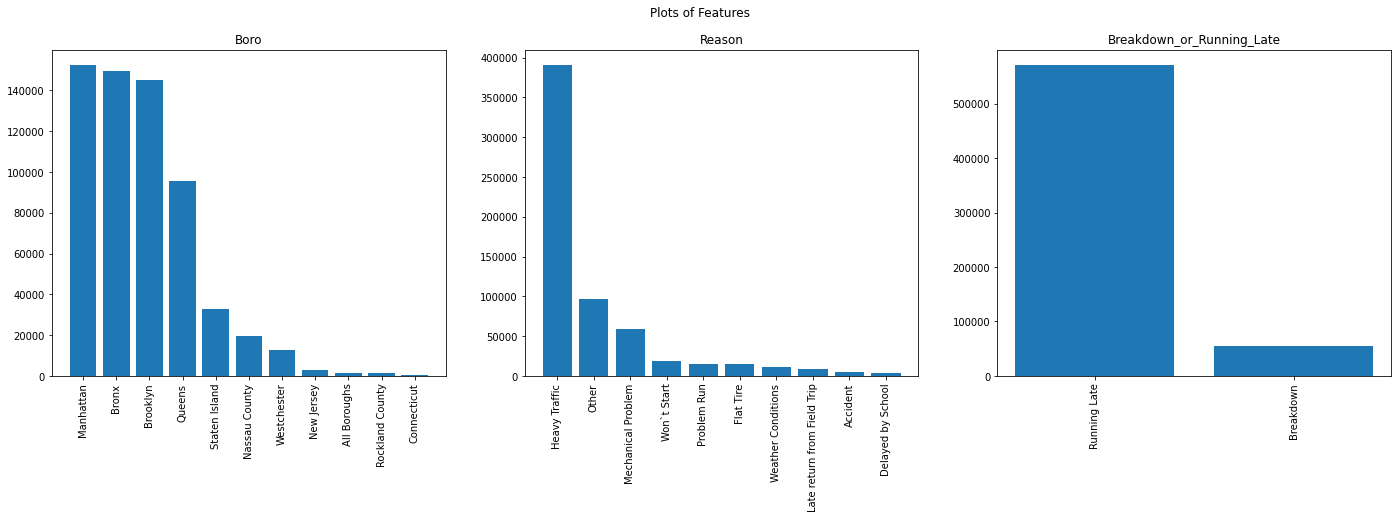

In [127]:
warnings.filterwarnings('ignore')

columns_to_plot_Data = ['Boro', 'Reason', 'Breakdown_or_Running_Late']

fig, axs = plt.subplots(1,3, figsize=(24, 6))
fig.suptitle("Plots of Features")
fig.subplots_adjust(hspace = .5, wspace=.2)
axs = axs.ravel()

i = 0
for column_name in columns_to_plot_Data:

    counts = Data[column_name].value_counts()
    
    # Rotate the tick labels in the second subplot
    axs[i].bar(counts.index, counts.values)
    axs[i].set_title(f"{column_name}")
    axs[i].set_xticklabels(counts.index, rotation=90)
    i += 1



In [152]:
def process(df): 

    #copy dataframe
    data = df.copy()

    #making a dictionary since we need to do a lot of conversion
    to_binary = {'Yes':1, 'No':0}

    #dropping columns we won't be able to use
    data = data.drop(['Busbreakdown_ID', 'Created_On', 
            'Informed_On','Incident_Number', 
            'Last_Updated_On', 'School_Age_or_PreK', 
            'School_Year', 'Route_Number', 'Schools_Serviced',
            'Run_Type', 'Bus_No', 'Bus_Company_Name'], axis = 1)

    #mapping literals to binary values
    data['Breakdown_or_Running_Late'] = data['Breakdown_or_Running_Late'].map({'Breakdown':1, 'Running Late':0})
    data['Has_Contractor_Notified_Parents'] = data['Has_Contractor_Notified_Parents'].map(to_binary)
    data['Has_Contractor_Notified_Schools'] = data['Has_Contractor_Notified_Schools'].map(to_binary)
    data['Have_You_Alerted_OPT'] = data['Have_You_Alerted_OPT'].map(to_binary)

    #getting month/date values
    data['Occurred_On'] = pd.to_datetime(data['Occurred_On'])
    data['Year'] = data['Occurred_On'].dt.year
    data['Month'] = data['Occurred_On'].dt.month
    data['Day'] = data['Occurred_On'].dt.day
    data['Hour'] = data['Occurred_On'].dt.hour
    data['Mins'] = data['Occurred_On'].dt.minute
    data['Weekday'] = data['Occurred_On'].dt.weekday


    data["sin_month"] = np.sin(2*np.pi*data["Month"]/max(data["Month"]))
    data["cos_month"] = np.cos(2*np.pi*data["Month"]/max(data["Month"]))
    data["sin_hour"] = np.sin(2*np.pi*data["Hour"]/max(data["Hour"]))
    data["cos_hour"] = np.cos(2*np.pi*data["Hour"]/max(data["Hour"]))
    data["sin_mins"] = np.sin(2*np.pi*data["Mins"]/max(data["Mins"]))
    data["cos_mins"] = np.cos(2*np.pi*data["Mins"]/max(data["Mins"]))

    #one hot encode boro
    for boro in data['Boro'].unique():
        data[boro] = (data['Boro'] == boro).astype(int)

    # one hot encode breakdown reason
    for reason in data['Reason'].unique():
        data[reason] = (data['Reason'] == reason).astype(int)

    data = data.drop(['Boro'], axis = 1)
    data = data.drop(['Reason'], axis = 1)

    #plot some features

    i = 0
    columns_to_plot_df = ['Month', 'Day', 'Hour', 'Weekday']

    fig, axs = plt.subplots(1,4, figsize=(24, 6))
    fig.suptitle("Plots of Features")
    fig.subplots_adjust(hspace = .5, wspace=.2)
    axs = axs.ravel()

    for column_name in columns_to_plot_df:
        
        counts = data[column_name].value_counts().sort_index()
        
        # Rotate the tick labels in the second subplot
        axs[i].bar(counts.index, counts.values)
        axs[i].set_title(f"{column_name}")
        i += 1

    data = data.drop(['Occurred_On', 'Month', 'Day', 'Hour', 'Mins'], axis = 1)

    return data


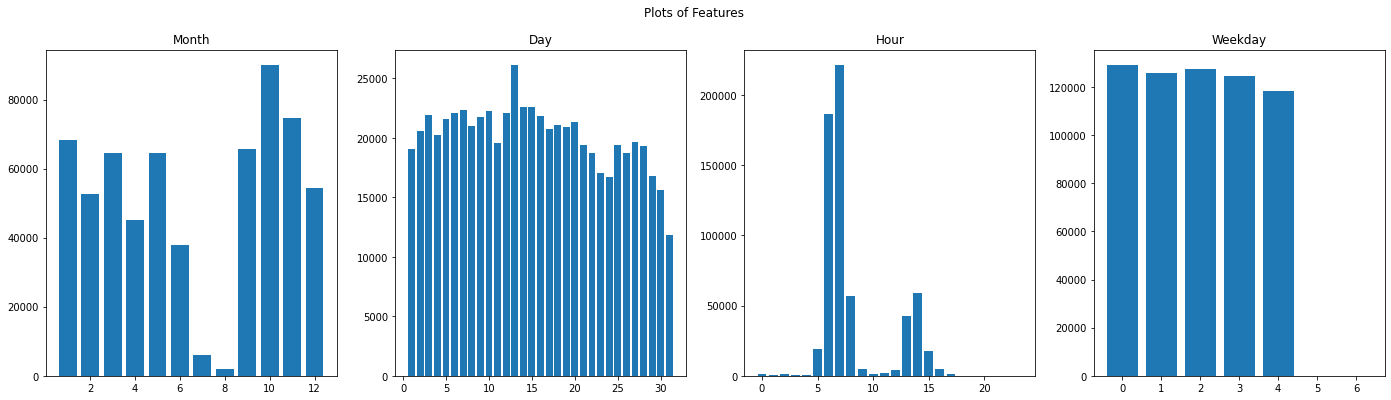

In [153]:
#Process the data
df = process(Data)


### Train Test Split

In [155]:

X = df.drop(['How_Long_Delayed'], axis = 1)
y = df['How_Long_Delayed']

X_train, y_train, X_test, y_test = train_test_split(X,y, test_size= .1)

,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Breakdown_or_Running_Late,Year,Weekday,sin_month,cos_month,...,Heavy Traffic,Flat Tire,Other,Won`t Start,Mechanical Problem,Problem Run,Accident,Late return from Field Trip,Delayed by School,Weather Conditions
0,-1,11,1,0,1,0,2015,3,-0.5,0.866025,...,1,0,0,0,0,0,0,0,0,0
1,0-30,2,1,1,0,0,2015,3,-0.5,0.866025,...,1,0,0,0,0,0,0,0,0,0
2,0-30,8,1,1,1,0,2015,3,-0.5,0.866025,...,1,0,0,0,0,0,0,0,0,0
3,0-30,6,0,0,0,0,2015,3,-0.5,0.866025,...,1,0,0,0,0,0,0,0,0,0
4,-1,6,0,0,0,0,2015,3,-0.5,0.866025,...,1,0,0,0,0,0,0,0,0,0
